In [1]:
pip install xgboost graphviz lightgbm xgboost lightgbm --upgradea


Usage:   
  /usr/local/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/local/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/local/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /usr/local/bin/python3 -m pip install [options] [-e] <local project path> ...
  /usr/local/bin/python3 -m pip install [options] <archive url/path> ...

no such option: --upgradea
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list

Package                   Version
------------------------- -----------
appnope                   0.1.4
asttokens                 3.0.0
attrs                     25.3.0
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.15
decorator                 5.2.1
executing                 2.2.0
fastjsonschema            2.21.1
fonttools                 4.59.0
graphviz                  0.21
ipykernel                 6.29.5
ipython                   9.4.0
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
joblib                    1.5.1
jsonschema                4.25.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.3
jupyter_core              5.8.1
kiwisolver                1.4.8
lightgbm                  4.6.0
matplotlib                3.10.3
matplotlib-inline         0.1.7
narwhals                  1.47.1
nbformat                  5.10.4
nest-asyncio              1.6.0
numpy              

In [3]:
import pandas as pd
import numpy as np

In [4]:
ross_df = pd.read_csv("./rossmann_sales_data/train.csv", low_memory=False)
store_df = pd.read_csv("./rossmann_sales_data/store.csv")
test_df = pd.read_csv("./rossmann_sales_data/test.csv")
submission_df = pd.read_csv("./rossmann_sales_data/sample_submission.csv")

In [5]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [9]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [10]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
merged_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [16]:
merged_df.shape

(1017209, 18)

In [17]:
merged_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [18]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

In [20]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [24]:
merged_df[merged_df.Sales <= 199].Sales.value_counts()

Sales
0      172871
124         1
46          1
133         1
Name: count, dtype: int64

In [25]:
merged_df[merged_df.Sales >= 199].Sales.value_counts().to_dict()

{5674: 215,
 5558: 197,
 5483: 196,
 6214: 195,
 6049: 195,
 5723: 194,
 5449: 192,
 5140: 191,
 5489: 191,
 5041: 190,
 5931: 188,
 6052: 188,
 5665: 188,
 5584: 187,
 5824: 187,
 5200: 187,
 5056: 187,
 5197: 187,
 5697: 185,
 5316: 185,
 5628: 184,
 5535: 184,
 5096: 184,
 6228: 184,
 5818: 184,
 5945: 184,
 4842: 184,
 5477: 183,
 5838: 182,
 4981: 182,
 6182: 182,
 5553: 182,
 5761: 182,
 5148: 182,
 5194: 181,
 5125: 181,
 4689: 181,
 5879: 181,
 5532: 180,
 5538: 180,
 6067: 180,
 5763: 180,
 5922: 179,
 6615: 179,
 5183: 179,
 6439: 179,
 6243: 179,
 5680: 179,
 5388: 179,
 6104: 179,
 5968: 179,
 5036: 179,
 5960: 179,
 5518: 178,
 4828: 178,
 5937: 178,
 5010: 178,
 6003: 178,
 6061: 178,
 5290: 178,
 5709: 178,
 5093: 178,
 5313: 178,
 6171: 177,
 6107: 177,
 5333: 177,
 6275: 177,
 5784: 177,
 5469: 177,
 5862: 177,
 4675: 177,
 5567: 176,
 5171: 176,
 6454: 176,
 5287: 176,
 6200: 176,
 5099: 176,
 5966: 176,
 5047: 176,
 5599: 176,
 5787: 175,
 6396: 175,
 4718: 175,
 515

In [26]:
merged_df[merged_df.Sales >= 199].Sales.value_counts().sum()

np.int64(844335)

In [27]:
numeric_cols = merged_df.select_dtypes(include=np.number).columns

In [28]:
numeric_cols

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [35]:
numeric_cols


Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [47]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [48]:
split_date(merged_df)
split_date(merged_test_df)

In [49]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


In [50]:
merged_df[merged_df.Open == 0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

In [51]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [52]:
def comp_months(df):
    df['CompetitonOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitonOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [53]:
comp_months(merged_df)
comp_months(merged_test_df)

In [54]:
merged_df[['Date', 'CompetitionOpen', 'Year', 'Month', 'Date', 'WeekOfYear']]

,Date,CompetitionOpen,Year,Month,Date,WeekOfYear
0,2015-07-31,106.0,2015,31,2015-07-31,31
1,2015-07-31,116.0,2015,31,2015-07-31,31
2,2015-07-31,127.0,2015,31,2015-07-31,31
3,2015-07-31,94.0,2015,31,2015-07-31,31
4,2015-07-31,27.0,2015,31,2015-07-31,31
...,...,...,...,...,...,...
1016776,2013-01-01,76.0,2013,1,2013-01-01,1
1016827,2013-01-01,159.0,2013,1,2013-01-01,1
1016863,2013-01-01,0.0,2013,1,2013-01-01,1
1017042,2013-01-01,0.0,2013,1,2013-01-01,1


In [55]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
              'CompetitionDistance', 'CompetitionOpen', 'Date', 'Month', 'Year', 'WeekOfYear', 'Promo2',]

In [56]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'CompetitonOpen', 'CompetitionOpen'],
      dtype='object')

In [57]:
input_cols

['Store',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpen',
 'Date',
 'Month',
 'Year',
 'WeekOfYear',
 'Promo2']

In [58]:
target_col = 'Sales'
target_col

'Sales'

In [59]:
X_train = merged_df[input_cols].copy()
y_train = merged_df[target_col].copy()

In [60]:
X_train

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Date,Month,Year,WeekOfYear,Promo2
0,1,5,1,0,1,c,a,1270.0,106.0,2015-07-31,31,2015,31,0
1,2,5,1,0,1,a,a,570.0,116.0,2015-07-31,31,2015,31,1
2,3,5,1,0,1,a,a,14130.0,127.0,2015-07-31,31,2015,31,1
3,4,5,1,0,1,c,c,620.0,94.0,2015-07-31,31,2015,31,0
4,5,5,1,0,1,a,a,29910.0,27.0,2015-07-31,31,2015,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,2013-01-01,1,2013,1,0
1016827,733,2,0,a,1,b,b,860.0,159.0,2013-01-01,1,2013,1,0
1016863,769,2,0,a,1,b,b,840.0,0.0,2013-01-01,1,2013,1,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,2013-01-01,1,2013,1,0


In [61]:
y_train

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [62]:
X_test = merged_test_df[input_cols].copy()

In [63]:
numeric_cols

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [64]:
X_train.isna().sum()

Store                     0
DayOfWeek                 0
Promo                     0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance    2186
CompetitionOpen           0
Date                      0
Month                     0
Year                      0
WeekOfYear                0
Promo2                    0
dtype: int64

In [65]:
X_test.isna().sum()

Store                   0
DayOfWeek               0
Promo                   0
StateHoliday            0
SchoolHoliday           0
StoreType               0
Assortment              0
CompetitionDistance    96
CompetitionOpen         0
Date                    0
Month                   0
Year                    0
WeekOfYear              0
Promo2                  0
dtype: int64

In [66]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen',
                'Promo2', 'Month', 'Year', 'WeekOfYear']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [67]:
X_train[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [68]:
X_train[categorical_cols].isna().sum()

DayOfWeek       0
StateHoliday    0
StoreType       0
Assortment      0
dtype: int64

In [69]:
max_distance = X_train.CompetitionDistance.max()

In [70]:
X_train['CompetitionDistance'].fillna(max_distance, inplace=True)
X_test['CompetitionDistance'].fillna(max_distance, inplace=True)

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_21933/3659676263.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_21933/3659676263.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [71]:
X_train[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [72]:
X_test[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler().fit(X_train[numeric_cols])

In [75]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [76]:
X_train.describe()

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Date,Month,Year,WeekOfYear,Promo2
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392,844392.000000,844392.000000,844392.000000,844392.000000
mean,0.500380,3.520361,0.446352,0.193580,0.074107,0.034260,2014-04-11 01:02:42.487565056,0.494523,0.415969,0.444055,0.498684
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,0.250449,2.000000,0.000000,0.000000,0.009098,0.000000,2013-08-16 00:00:00,0.233333,0.000000,0.196078,0.000000
50%,0.500000,3.000000,0.000000,0.000000,0.030459,0.019149,2014-03-31 00:00:00,0.500000,0.500000,0.431373,0.000000
75%,0.750449,5.000000,1.000000,0.000000,0.090849,0.058865,2014-12-10 00:00:00,0.733333,0.500000,0.666667,1.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2015-07-31 00:00:00,1.000000,1.000000,1.000000,1.000000
std,0.288808,1.723689,0.497114,0.395103,0.113142,0.048260,NaN,0.289449,0.388630,0.282153,0.499999


In [77]:
X_test.describe()

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Date,Month,Year,WeekOfYear,Promo2
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088,41088.000000,41088.0,41088.000000,41088.000000
mean,0.498114,3.979167,0.395833,0.443487,0.069013,0.036979,2015-08-24 12:00:00,0.417361,1.0,0.659722,0.580607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2015-08-01 00:00:00,0.000000,1.0,0.588235,0.000000
25%,0.250224,2.000000,0.000000,0.000000,0.009230,0.000000,2015-08-12 18:00:00,0.191667,1.0,0.627451,0.000000
50%,0.495961,4.000000,0.000000,0.000000,0.032041,0.022695,2015-08-24 12:00:00,0.383333,1.0,0.666667,1.000000
75%,0.746185,6.000000,1.000000,1.000000,0.085970,0.060993,2015-09-05 06:00:00,0.608333,1.0,0.686275,1.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2015-09-17 00:00:00,1.000000,1.0,0.725490,1.000000
std,0.287500,2.015481,0.489035,0.496802,0.105288,0.054491,NaN,0.281615,0.0,0.039519,0.493466


In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
encoder = OneHotEncoder(sparse_output=False, drop=None)  
encoded_array = encoder.fit_transform(X_train[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=X_train.index)
X_train = pd.concat([X_train.drop(columns=categorical_cols), encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), encoded_df], axis=1)

In [80]:
X_train.describe()

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Date,Month,Year,WeekOfYear,Promo2,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392,844392.000000,844392.000000,844392.000000,844392.000000,...,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,0.500380,0.446352,0.193580,0.074107,0.034260,2014-04-11 01:02:42.487565056,0.494523,0.415969,0.444055,0.498684,...,0.000822,0.000172,0.000084,0.541309,0.018431,0.133798,0.306462,0.526899,0.009725,0.463376
min,0.000000,0.000000,0.000000,0.000000,0.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250449,0.000000,0.000000,0.009098,0.000000,2013-08-16 00:00:00,0.233333,0.000000,0.196078,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.030459,0.019149,2014-03-31 00:00:00,0.500000,0.500000,0.431373,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.750449,1.000000,0.000000,0.090849,0.058865,2014-12-10 00:00:00,0.733333,0.500000,0.666667,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2015-07-31 00:00:00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.288808,0.497114,0.395103,0.113142,0.048260,NaN,0.289449,0.388630,0.282153,0.499999,...,0.028657,0.013103,0.009169,0.498291,0.134504,0.340435,0.461024,0.499276,0.098136,0.498657


In [81]:
from xgboost import XGBRegressor

In [82]:
import platform
print(platform.architecture())

('64bit', 'Mach-O')


In [83]:
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : typing.Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with hig

In [84]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=30, max_depth=4, enable_categorical=True)

In [85]:
X_train.columns

Index(['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpen', 'Date', 'Month', 'Year', 'WeekOfYear', 'Promo2',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [86]:
import datetime 

In [87]:
X_train.select_dtypes(datetime.datetime)

""
0
1
2
3
4
...
1016776
1016827
1016863
1017042


In [88]:
X_train.drop('Date', axis=1, inplace=True)

In [89]:
target_col

'Sales'

In [90]:
merged_df[target_col]

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [91]:
X_train['Date'] # Should return an error if drop() was executed correctly

KeyError: 'Date'

In [92]:
%%time
model.fit(X_train, merged_df[target_col])

CPU times: user 1.79 s, sys: 93.3 ms, total: 1.88 s
Wall time: 339 ms


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [93]:
preds = model.predict(X_train)

In [94]:
preds

array([ 8197.487 ,  7993.3267,  8551.961 , ...,  7481.5264,  8418.646 ,
       10220.73  ], shape=(844392,), dtype=float32)

In [96]:
X_target = merged_df[target_col]

In [97]:
X_target

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [104]:
from sklearn.metrics import root_mean_squared_error

In [105]:
def rmse(a, b):
    return root_mean_squared_error(a, b)

In [106]:
rmse(preds, X_target)

2281.3291015625

In [116]:
def create_model(**params):
    model = XGBRegressor(n_jobs=-1, **params)
    model.fit(X_train, merged_df[target_col])
    preds = model.predict(X_train)
    return rmse(preds, merged_df[target_col])

In [117]:
importance_df = pd.DataFrame({
    'feature': X_train.columns, 
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [118]:
importance_df

,feature,importance
1,Promo,0.358789
9,DayOfWeek_1,0.095728
21,StoreType_b,0.078276
8,Promo2,0.060817
24,Assortment_a,0.051526
3,CompetitionDistance,0.038676
26,Assortment_c,0.036531
7,WeekOfYear,0.029004
0,Store,0.028933
5,Month,0.025227


<Axes: title={'center': 'Feature importance'}, xlabel='importance', ylabel='feature'>

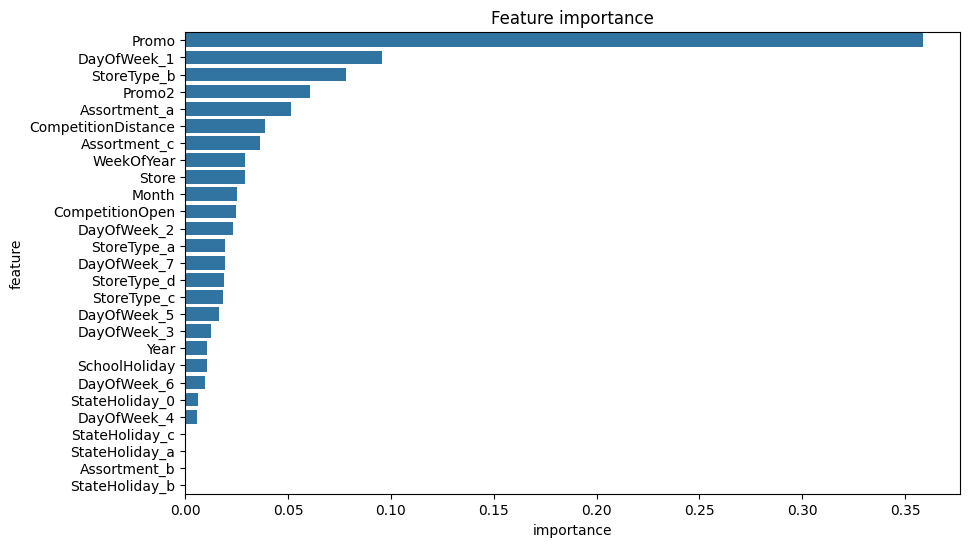

In [119]:
plt.figure(figsize=(10,6))
plt.title('Feature importance')
sns.barplot(data=importance_df, x='importance', y='feature')

In [120]:
create_model(n_estimators=60, max_depth=6, random_state=42)

1460.3759765625

In [152]:
import random

def train_random_model(**params):
    model_stats = []

    for _ in range(3):
        estimators = random.randint(70, 150)
        max_depth = random.randint(7, 17)

        model = XGBRegressor(
            n_jobs=-1, 
            n_estimators=estimators, 
            max_depth=max_depth, 
            random_state=42,
            **params,
        ).fit(X_train, X_target)

        preds = model.predict(X_train)
        score = rmse(preds, X_target)

        model_stats.append((score, f"Estimators: {estimators} | Max Depth: {max_depth}"))

    return sorted(model_stats, key=lambda x: x[0])

In [155]:
train_random_model(learning_rate=1)

[(390.3081970214844, 'Estimators: 114 | Max Depth: 12'),
 (428.115478515625, 'Estimators: 95 | Max Depth: 12'),
 (795.6226806640625, 'Estimators: 92 | Max Depth: 8')]